In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [24]:
class Roc_Values_RF():
    def __init__(self,
                 data_path,
                 test_size,
                 seed):
        self.df = pd.read_csv(data_path)
        self.test_size = test_size
        self.seed = seed
    def train_test_split(self):
        X = self.df.drop(columns='Class')
        self.df['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
        y = self.df['Class']
        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=self.test_size,random_state=self.seed)
        return Xtrain, Xtest, ytrain, ytest
    def undersampling_balance(self,Xtrain,ytrain):
        rus = RandomUnderSampler(random_state=self.seed)
        X_res, y_res = rus.fit_resample(Xtrain,ytrain)
        return X_res, y_res
    def oversampling_balance(self,Xtrain,ytrain):
        sm = SMOTE(random_state=self.seed)
        X_sm, y_sm = sm.fit_resample(Xtrain,ytrain)
        return X_sm, y_sm
    def get_fpr_tpr(self, Xtrain, Xtest, ytrain, ytest):
        rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=self.seed)
        rf.fit(Xtrain,ytrain)
        yproba = rf.predict_proba(Xtest)
        fpr, tpr, _ = roc_curve(np.array(ytest),yproba[:,1], pos_label=1)
        return fpr, tpr

In [25]:
list_identifiers = ['A','B','C','D','E']
seed = 1
test_size = 0.2
tpr_values = []
fpr_values = []
auc_values = []
for identifier in list_identifiers:
    data_path = 'feature_sets\FeaturesSet' + identifier + '.csv'
    roc_gen = Roc_Values_RF(data_path,test_size,seed)
    Xtrain, Xtest, ytrain, ytest = roc_gen.train_test_split()
    fpr, tpr = roc_gen.get_fpr_tpr(Xtrain,Xtest,ytrain,ytest)
    auc_values.append(auc(fpr,tpr))
    fpr_values.append(fpr)
    tpr_values.append(tpr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

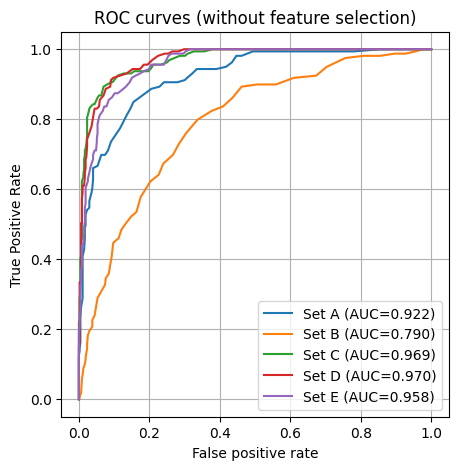

In [35]:
plt.figure(figsize=(5,5), dpi=100)
for i in range(len(fpr_values)):
    plt.plot(fpr_values[i], tpr_values[i], linestyle='-', label='Set %s ' %list_identifiers[i] + '(AUC=%0.3f)' % auc_values[i])
plt.title('ROC curves (without feature selection)')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [36]:
tpr_values = []
fpr_values = []
auc_values = []
for identifier in list_identifiers:
    data_path = 'feature_sets_CFS\FeaturesSet' + identifier + '_CFS.csv'
    roc_gen = Roc_Values_RF(data_path,test_size,seed)
    Xtrain, Xtest, ytrain, ytest = roc_gen.train_test_split()
    fpr, tpr = roc_gen.get_fpr_tpr(Xtrain,Xtest,ytrain,ytest)
    auc_values.append(auc(fpr,tpr))
    fpr_values.append(fpr)
    tpr_values.append(tpr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

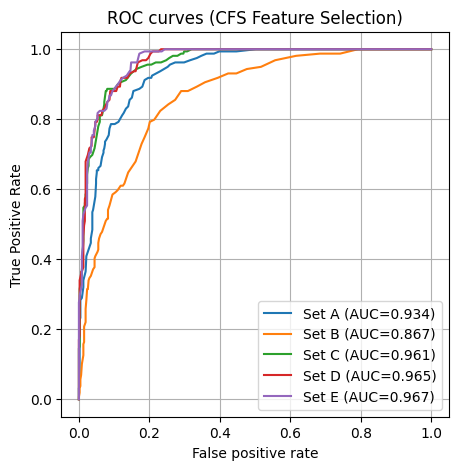

In [37]:
plt.figure(figsize=(5,5), dpi=100)
for i in range(len(fpr_values)):
    plt.plot(fpr_values[i], tpr_values[i], linestyle='-', label='Set %s ' %list_identifiers[i] + '(AUC=%0.3f)' % auc_values[i])
plt.title('ROC curves (CFS Feature Selection)')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [38]:
tpr_values = []
fpr_values = []
auc_values = []
for identifier in list_identifiers:
    data_path = 'feature_sets_IG\FeaturesSet' + identifier + '_IG.csv'
    roc_gen = Roc_Values_RF(data_path,test_size,seed)
    Xtrain, Xtest, ytrain, ytest = roc_gen.train_test_split()
    fpr, tpr = roc_gen.get_fpr_tpr(Xtrain,Xtest,ytrain,ytest)
    auc_values.append(auc(fpr,tpr))
    fpr_values.append(fpr)
    tpr_values.append(tpr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

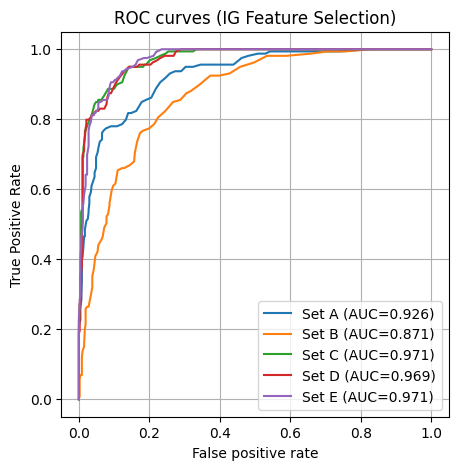

In [39]:
plt.figure(figsize=(5,5), dpi=100)
for i in range(len(fpr_values)):
    plt.plot(fpr_values[i], tpr_values[i], linestyle='-', label='Set %s ' %list_identifiers[i] + '(AUC=%0.3f)' % auc_values[i])
plt.title('ROC curves (IG Feature Selection)')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()